# Data Analysis

## Summary 

In [1]:
%matplotlib inline
# import dependencies
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

In [2]:
# load data
spoti_df = pd.read_csv('output_data/spotipy_data.csv')

## Did people listen to different music genres pre and post-COVID?

### Top 10 genres: genres with the most number of songs in top 100 year playlists

In [3]:
# create a new df where we unpack the artist genre column, so we can look at genre distribution across the years
# https://www.learndatasci.com/solutions/python-pandas-dfexplode/
genre_df = spoti_df
genre_df["artist genre"] = genre_df['artist genre'].apply(literal_eval)
genre_df = genre_df.explode("artist genre")

In [4]:
# group by year, so we can look at how genre distribution differs across the years 
genre_by_year = genre_df.groupby("Year", as_index = True)["artist genre"].value_counts()

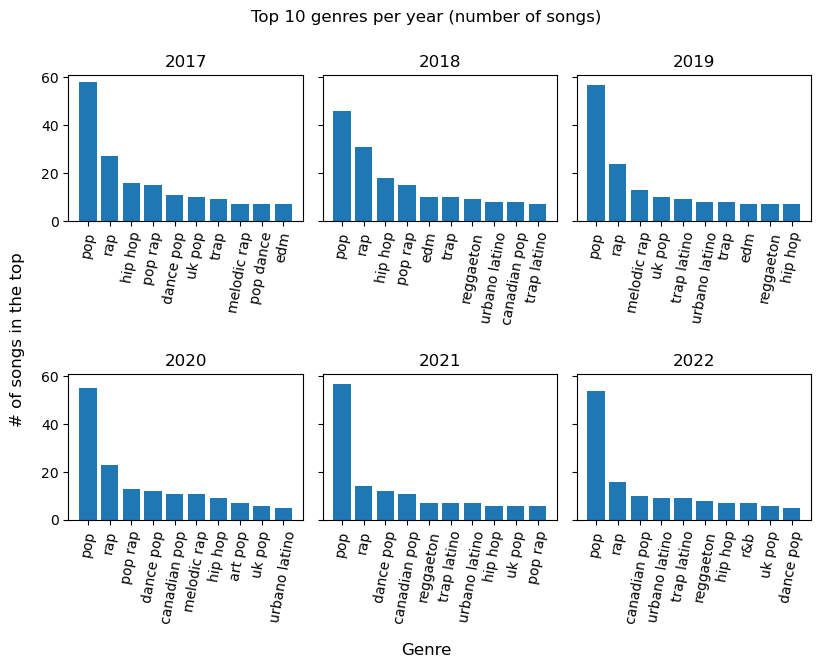

<Figure size 640x480 with 0 Axes>

In [118]:
# create a plot showing the top 10 genres for each year
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

# create subplot
fig, axs = plt.subplots(2, 3, sharey = True, figsize=(8, 6))
axs[0, 0].bar(genre_by_year[2017][0:10].index.to_list(), [genre_by_year[2017][x] for x in range(0,10)])
axs[0, 0].set_title('2017')
axs[0, 1].bar(genre_by_year[2018][0:10].index.to_list(), [genre_by_year[2018][x] for x in range(0,10)])
axs[0, 1].set_title('2018')
axs[0, 2].bar(genre_by_year[2019][0:10].index.to_list(), [genre_by_year[2019][x] for x in range(0,10)])
axs[0, 2].set_title('2019')
axs[1, 0].bar(genre_by_year[2020][0:10].index.to_list(), [genre_by_year[2020][x] for x in range(0,10)])
axs[1, 0].set_title('2020')
axs[1, 1].bar(genre_by_year[2021][0:10].index.to_list(), [genre_by_year[2021][x] for x in range(0,10)])
axs[1, 1].set_title('2021')
axs[1, 2].bar(genre_by_year[2022][0:10].index.to_list(), [genre_by_year[2022][x] for x in range(0,10)])
axs[1, 2].set_title('2022')

for ax in axs.flat:
    ax.tick_params(axis = 'x', rotation = 80)
    
# fine tune it (space it and add general labels and title)
fig.tight_layout(h_pad=2)
fig.supxlabel('Genre', y = -0.03)
fig.supylabel('# of songs in the top', x = -0.02)
plt.suptitle("Top 10 genres per year (number of songs)", y = 1.05)
plt.show()

# save figure
plt.savefig("output_data/top_genres_numsongs.png")


### While some genders stay consistently in the top 10 (e.g. pop and rap), others fluctuate throughout the 6 years, so let's have a closer look at some specific genres

In [71]:
# put together info on specific genres
years = [2017, 2018, 2019, 2020, 2021, 2022]
pop = []
rap = []
hip_hop = []
canadian_pop = []
edm = []
dance_pop = []

for year in years:
    pop.append(genre_by_year[year]["pop"])
    rap.append(genre_by_year[year]["rap"])
    hip_hop.append(genre_by_year[year]["hip hop"])
    canadian_pop.append(genre_by_year[year]["canadian pop"])
    edm.append(genre_by_year[year]["edm"])
    dance_pop.append(genre_by_year[year]["dance pop"])

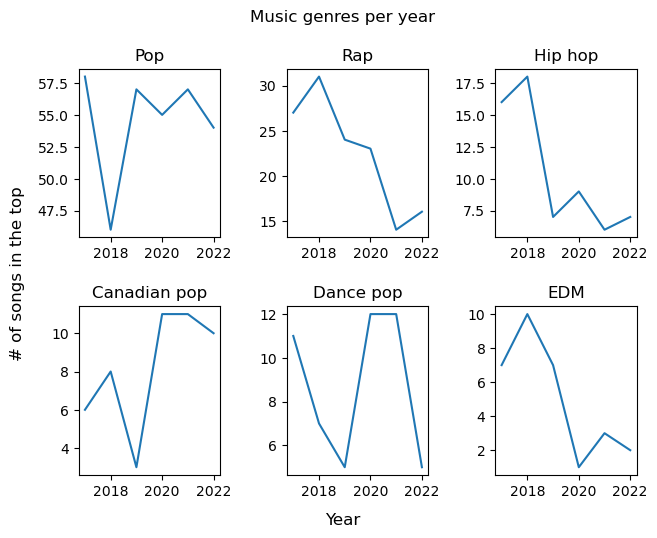

In [95]:
# create subplot
fig, axs = plt.subplots(2, 3)
axs[0,0].plot(years, pop)
axs[0,0].set_title('Pop')
#axs[0].set_ylim([40,60])
axs[0,1].plot(years, rap)
#axs[1].set_ylim([10,40])
axs[0,1].set_title('Rap')
axs[0,2].plot(years, hip_hop)
axs[0,2].set_title('Hip hop')
axs[1,0].plot(years, canadian_pop)
axs[1,0].set_title('Canadian pop')
axs[1,1].plot(years, dance_pop)
axs[1,1].set_title('Dance pop')
axs[1,2].plot(years, edm)
axs[1,2].set_title('EDM')

# finr tune it
fig.tight_layout(h_pad=1.8)
fig.supxlabel('Year', y = -0.03)
fig.supylabel('# of songs in the top', x = -0.02)
plt.suptitle("Music genres per year", y = 1.05)
plt.show()

# save figure
plt.savefig("output_data/specific_genres.png")

Was canadian pop's popularity increase driven by the genre itself or by the popularity of a handful of artists?

In [101]:
canadian_artists = pd.Series(genre_df[genre_df["artist genre"] == "canadian pop"]["artist name"].unique())
canadian_artists

0     Shawn Mendes
1            Drake
2       The Weeknd
3     Alessia Cara
4    Justin Bieber
dtype: object

In [100]:
pop_dance_artists = pd.Series(genre_df[genre_df["artist genre"] == "dance pop"]["artist name"].unique())
pop_dance_artists

0        Camila Cabello
1            Bruno Mars
2             Sean Paul
3              Dua Lipa
4                Avicii
5                  P!nk
6         Calvin Harris
7          Jason Derulo
8              DJ Snake
9            Bebe Rexha
10    Justin Timberlake
11            Lady Gaga
12             Doja Cat
13           Joel Corry
14      Black Eyed Peas
15              Shakira
16         David Guetta
dtype: object

### Genres with highest average popularity per year

The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

NOTE TO SELF - does this mean we are getting current popularity track rather than back in the year we're looking at?

In [102]:
# calculate average popularity for each genre, each year and sort values from highest to lowest popularity
popularity_df = genre_df.groupby(["Year","artist genre"])["track popularity"].mean().sort_values(ascending=False)

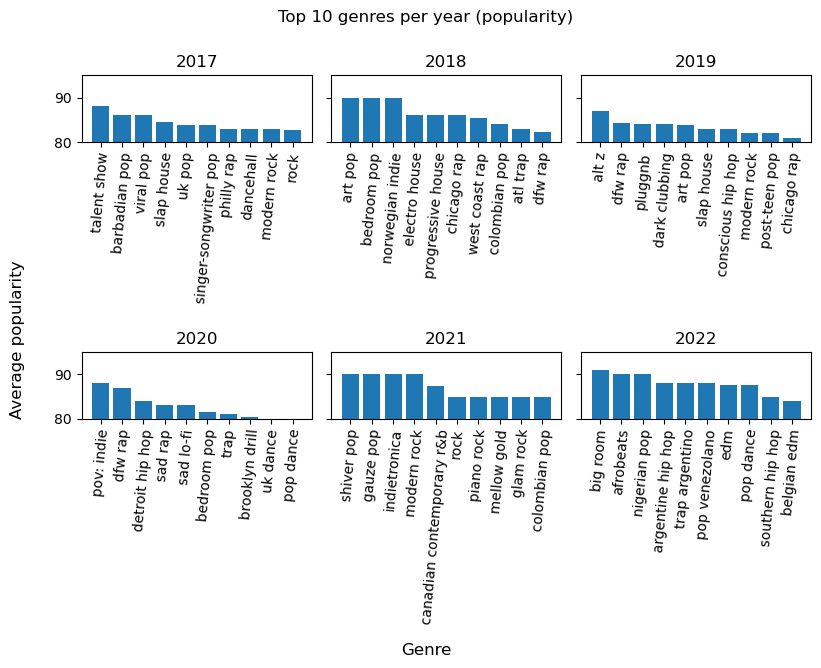

<Figure size 640x480 with 0 Axes>

In [119]:
# plot most popular genres per year

# create subplot
fig, axs = plt.subplots(2, 3, sharey = True, figsize=(8, 6))
axs[0, 0].bar(popularity_df[2017][0:10].index.to_list(), [popularity_df[2017][x] for x in range(0,10)])
axs[0, 0].set_title('2017')
axs[0, 1].bar(popularity_df[2018][0:10].index.to_list(), [popularity_df[2018][x] for x in range(0,10)])
axs[0, 1].set_title('2018')
axs[0, 2].bar(popularity_df[2019][0:10].index.to_list(), [popularity_df[2019][x] for x in range(0,10)])
axs[0, 2].set_title('2019')
axs[1, 0].bar(popularity_df[2020][0:10].index.to_list(), [popularity_df[2020][x] for x in range(0,10)])
axs[1, 0].set_title('2020')
axs[1, 1].bar(popularity_df[2021][0:10].index.to_list(), [popularity_df[2021][x] for x in range(0,10)])
axs[1, 1].set_title('2021')
axs[1, 2].bar(popularity_df[2022][0:10].index.to_list(), [popularity_df[2022][x] for x in range(0,10)])
axs[1, 2].set_title('2022')

for ax in axs.flat:
    ax.set_ylim([80,95])
    ax.tick_params(axis = 'x', rotation = 85)


# fine tune it (space it and add general labels and title)
fig.tight_layout(h_pad=2)
fig.supxlabel('Genre', y = -0.03)
fig.supylabel('Average popularity', x = -0.02)
plt.suptitle("Top 10 genres per year (popularity)", y = 1.05)
plt.show()

# save figure
plt.savefig("output_data/top_genres_popularity.png")